In [2]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('D:\\Python\\ml basics\\auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Pre-process the data

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [14]:
df.describe()
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
q1=df['mpg'].quantile(0.25)
q3=df['mpg'].quantile(0.75)
iqr=q3-q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr
print(lower_lim,upper_lim)

0.25 46.25


In [10]:
#print outliers--
df[(df['mpg']<lower_lim) & (df['mpg']>upper_lim)]       # => no outliers are there in out dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


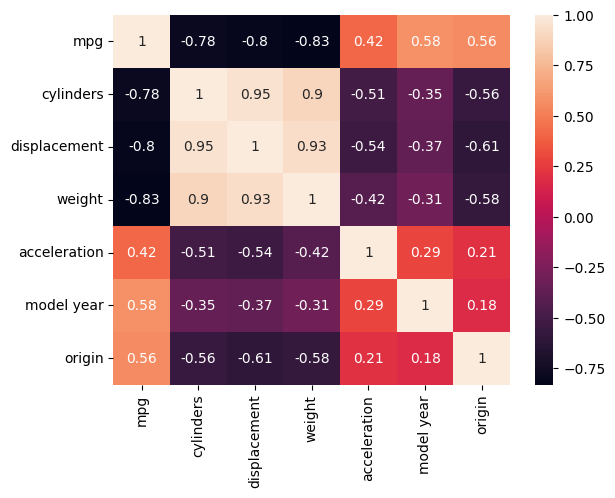

In [16]:
new_df = df.drop(columns=['horsepower','car name'])
sns.heatmap(new_df.corr(),annot=True)
plt.show()

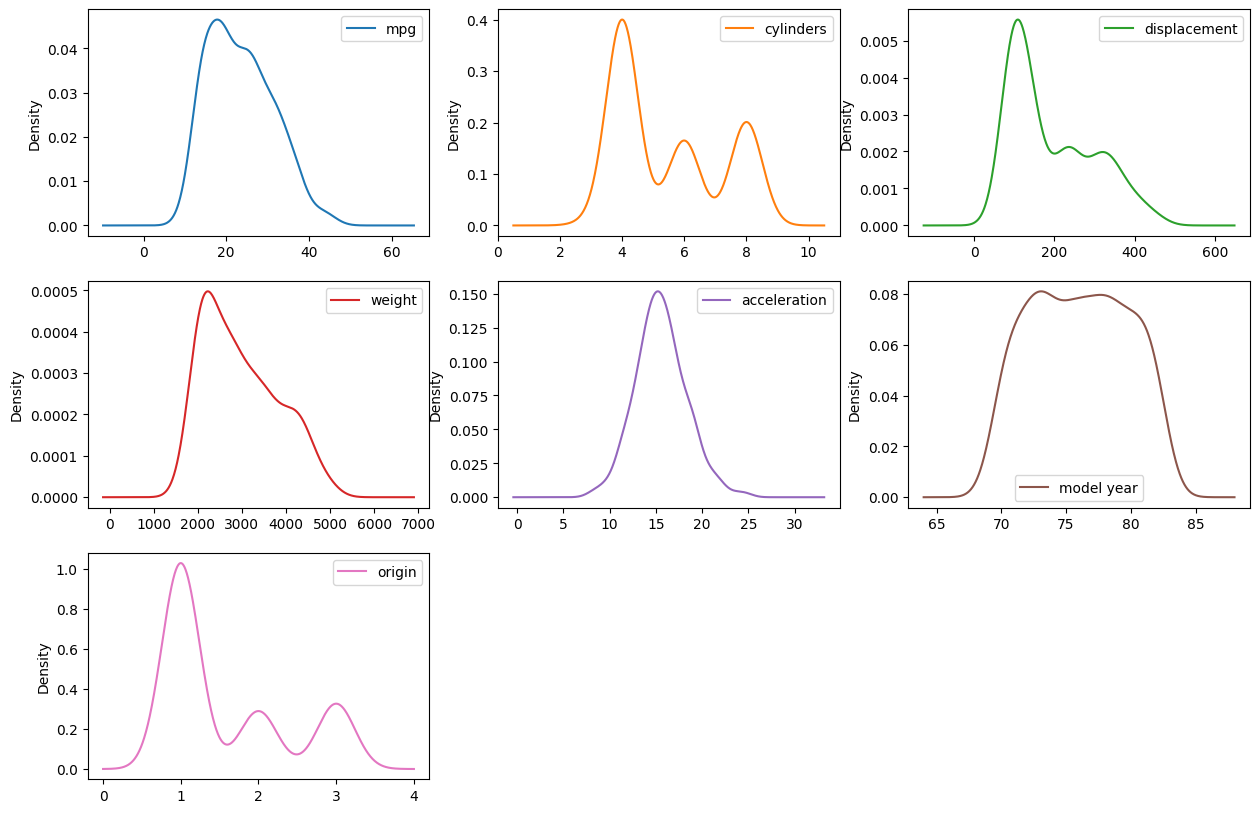

In [17]:
df.plot(kind='density', subplots =True, layout=(3,3),sharex=False,sharey=False, figsize=(15,10))
plt.show()

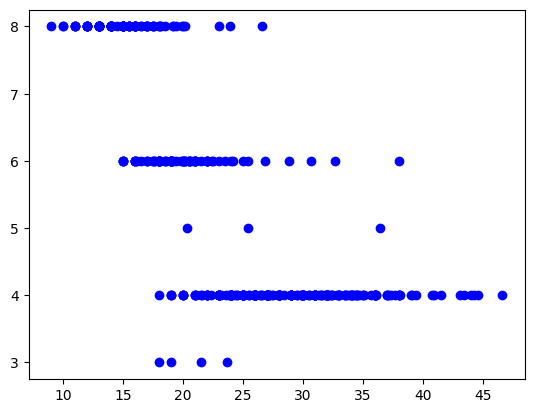

In [18]:
x=df['mpg']
y=df['cylinders']
plt.scatter(x,y,c='b')
plt.show()

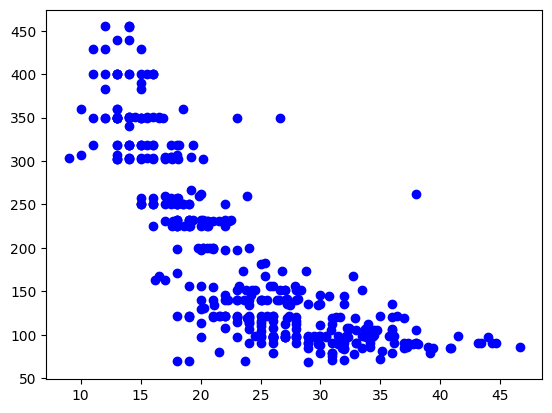

In [19]:
x=df['mpg']
y=df['displacement']
plt.scatter(x,y,c='b')
plt.show()

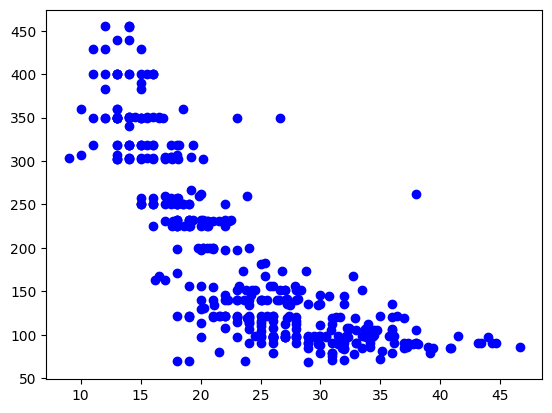

In [20]:
x=df['mpg']
y=df['displacement']
plt.scatter(x,y,c='b')
plt.show('weight')

In [21]:
#that implies now---
#our data has no null or outliers 
#we've a correlancy matrix to know which is depending on what

Now start data analysis

In [29]:
y = df['mpg']
x = df.drop(columns=['mpg','horsepower','car name'])
x

,cylinders,displacement,weight,acceleration,model year,origin
0,8,307.0,3504,12.0,70,1
1,8,350.0,3693,11.5,70,1
2,8,318.0,3436,11.0,70,1
3,8,304.0,3433,12.0,70,1
4,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...
393,4,140.0,2790,15.6,82,1
394,4,97.0,2130,24.6,82,2
395,4,135.0,2295,11.6,82,1
396,4,120.0,2625,18.6,82,1


In [30]:
#train test split--
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100,test_size=0.25,train_size=0.75)
y_test

326    43.4
54     35.0
78     21.0
169    20.0
368    27.0
       ... 
90     12.0
6      14.0
188    16.0
381    36.0
125    20.0
Name: mpg, Length: 100, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [32]:
model.fit(x_train,y_train)

LinearRegression()

Here are coefficients and intercepts

In [39]:


model.coef_

array([-0.30655159,  0.01629707, -0.00696742,  0.1542444 ,  0.77148303,
        1.36844874])

In [34]:
model.intercept_

-20.5130084721187

Testing our model with test data

In [52]:
model.score(x_test,y_test)*100

83.45967398550476

In [54]:
from sklearn import metrics


In [44]:
ans_df = pd.DataFrame(model.predict(x_test))
ans_df

,0
0,31.569731
1,29.852769
2,20.751935
3,22.823131
4,29.191075
...,...
95,8.983885
96,10.857768
97,15.029899
98,34.244912


In [56]:
predictions = model.predict(x_test)
metrics.mean_absolute_error(y_test,predictions)

2.5244850578731843

In [59]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.3163892286504004